# Support Vector Machines

## Linearly Separable Case

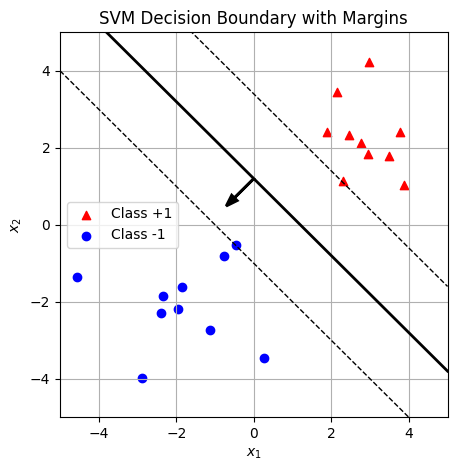

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
class1 = np.random.randn(10, 2) + np.array([2, 2])  # Shifted positive class
class2 = np.random.randn(10, 2) + np.array([-2, -2]) # Shifted negative class

# Define a linear decision boundary
# x_vals = np.linspace(np.min(np.array([class1[:,0],class2[:,0]])), np.max(np.array([class1[:,0],class2[:,0]])), 100)
x_vals = np.linspace(-5, 5, 100)
y_vals = -1*x_vals + 1.2  # Decision boundary (w.x + b = 0)

# Compute margins
margin1 = -1*x_vals + 3.4
margin2 = -1*x_vals - 1

# Plot data points
plt.figure(figsize=(5, 5))
plt.scatter(class1[:, 0], class1[:, 1], marker='^', color='r', label='Class +1')
plt.scatter(class2[:, 0], class2[:, 1], marker='o', color='b', label='Class -1')

# Plot decision boundary and margins
plt.plot(x_vals, y_vals, 'k-', linewidth=2)
plt.plot(x_vals, margin1, 'k--', linewidth=1)
plt.plot(x_vals, margin2, 'k--', linewidth=1)

# Normal vector
plt.arrow(0, 1.2, -0.5, -0.5, head_width=0.2, head_length=0.3, fc='k', ec='k', linewidth=2)

# Labels and legend
plt.legend()
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("SVM Decision Boundary with Margins")
plt.grid(True)

# Show plot
plt.show()

Let's assume we have a binary data as in the plot with class labels $y_i \in \{-1,+1\}$ (this way of labelling makes many future computations easier instead of $\{0,1\}$ but both will give identical results). Instead of merely finding a decision boundary, we want to define a margin with certain thickness such that all data points belonging to a certain class will remain in the same side of this margin. Let's define the margin boundaries that are shown with dashed lines as;

$\mathbf{w}^T \mathbf{x} + w_0 = +1, \quad \text{for positive class}\\
\mathbf{w}^T \mathbf{x} + w_0 = -1, \quad \text{for negative class}$

Before going any further, we should find the distance between these 2 parallel lines. The distance between two lines is the smallest distance between them. Thus, if we take two points $\mathbf{x}_{+1}$ and $\mathbf{x}_{-1}$ that are on these lines such that the distance between them is the smallest possible, then the difference vector $\mathbf{x}_{+1}-\mathbf{x}_{-1}$ must be parallel to normal vector $\mathbf{w}$. Thus, we have following 3 equations;

$\mathbf{w}^T \mathbf{x}_{+1} + w_0 = +1 \\
\mathbf{w}^T \mathbf{x}_{-1} + w_0 = -1 \\
\mathbf{x}_{+1}-\mathbf{x}_{-1}=k\mathbf{w} $

$k$ here is a scalar value showing the parallelity of the difference vector and line normal. Solving 3 equations simultaneously, it will be found as $k=2/ \| \mathbf{w} \|^2 $ .

Hence, the distance between two boundary lines is;

$$
\| \mathbf{x}_{+1}-\mathbf{x}_{-1} \|
= \sqrt{(\mathbf{x}_{+1}-\mathbf{x}_{-1})^T(\mathbf{x}_{+1}-\mathbf{x}_{-1})}
= \sqrt{k\mathbf{w}^T k\mathbf{w}} = \frac{2}{\| \mathbf{w} \|}
$$

Now we want to maximize this distance with the constraints $\mathbf{w}^T \mathbf{x}_{i} + w_0 \geq +1$ for $y_i=+1$ and $\mathbf{w}^T \mathbf{x}_{i} + w_0 \leq -1$ for $y_i=-1$. These can be merged into a single inequality as $y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) \geq 1 $.

Maximizing $1/\| \mathbf{w} \|$ is equivalent to minimizing $\| \mathbf{w} \|$ or its square, thus the optimization problem can be defined as;

$$
\min_{\mathbf{w}, \, w_0} \quad \frac{1}{2} \| \mathbf{w} \|^2
\quad \text{s.t.} \quad y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) \geq 1, \quad i = 1, 2, \dots, n
$$

The Lagrangian to solve this problem is;

$$
L(\mathbf{w},  w_0, \lambda_1, \lambda_2, \dots, \lambda_n) = \frac{1}{2} \| \mathbf{w} \|^2 - \sum_{i=1}^{n} \lambda_{i} (y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) - 1)
$$

Karush-Kuhn-Tucker (KKT) conditions require that

$$
\frac{\partial L}{\partial \mathbf{w} } = \mathbf{w} - \sum_{i=1}^{n} \lambda_{i} y_i \mathbf{x}_{i} =0, \quad \frac{\partial L}{\partial w_0 }=-\sum_{i=1}^{n} \lambda_{i} y_i =0 \\
\lambda_{i} (y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) - 1) = 0, \,\, \forall \, i \\
 \lambda_{i} \geq 0, \,\, \forall \, i \\
 y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) \geq 1, \,\, \forall \, i
$$

From the first of first set of equations related to derivatives, it can be concluded that

$$
\mathbf{w} = \sum_{i=1}^{n} \lambda_{i} y_i \mathbf{x}_{i}
$$

which basically says the weights to be learned will be the linear combinations of the data points. A more important result, which will also be the powerful part of using support vector machines, is from the second equality which allows two options;

$$
\lambda_i=0 \quad \text{OR} \quad y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) = 1
$$

This is significant because it states that a data point $\mathbf{x}_{i}$ should either satisfy the given line equation or its corresponding multiplier $\lambda_i$ must be 0. Since only a small set of points that are exactly on the margin boundaries satisfy this equation, this means most of the data points will have $\lambda_i=0$ and can be discarded for weight calculation and also can be forgotten completely in inference. The remaining few data points with nonzero contribution will be called **support vectors** and they will be the only effective points to make classification.

Finally, $w_0$ can be calculated using any support vector $\mathbf{x}_{\text{sv},i}$ as

$$
w_0 = \frac{1}{y_i} - \mathbf{w}^T \mathbf{x}_{\text{sv},i} = y_i - \mathbf{w}^T \mathbf{x}_{\text{sv},i}
$$

Now based on this we can rewrite the dual Lagrange problem removing the dependence on $\mathbf{w}$ and $w_0$.

$$
L^\ast(\lambda_1, \lambda_2, \dots, \lambda_n)  =  \min_{\mathbf{w}, \, w_0} \, L(\mathbf{w},  w_0, \lambda_1, \lambda_2, \dots, \lambda_n)
$$

Then;

$$
\begin{align}
L^\ast(\lambda_1, \lambda_2, \dots, \lambda_n)  
&= \frac{1}{2} \underbrace{\sum_{i=1}^{n} \lambda_{i} y_i \mathbf{x}_{i}^T }_{\mathbf{w}^T} \,\, \underbrace{\sum_{j=1}^{n} \lambda_{j} y_j \mathbf{x}_{j}}_{\mathbf{w}} - \sum_{i=1}^{n} \lambda_{i} \left(y_i \left( \underbrace{\left( \sum_{j=1}^{n} \lambda_{j} y_j \mathbf{x}_{j}^T \right)}_{\mathbf{w}^T} \,\, \mathbf{x}_{i} + w_0 \right) - 1\right) \\
&=\frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i  y_j \mathbf{x}_{i}^T  \mathbf{x}_{j} - \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i   y_j \mathbf{x}_{j}^T  \mathbf{x}_{i} - w_0 \underbrace{\sum_{i=1}^{n}\lambda_{i}y_i }_{=0}  + \sum_{i=1}^{n}\lambda_{i} \\
&= \sum_{i=1}^{n}\lambda_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i  y_j \mathbf{x}_{i}^T  \mathbf{x}_{j}  \\
\end{align}
$$

and new constraints are $\lambda_i \geq 0$ and $\sum_{i=1}^{n} \lambda_{i} y_i =0$. The problem can be defined as;

$$
\max_{\lambda_1, \lambda_2, \dots, \lambda_n} \quad \sum_{i=1}^{n}\lambda_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i  y_j \mathbf{x}_{i}^T  \mathbf{x}_{j}
\quad \text{s.t.} \quad \lambda_{i} \geq 0, \,\,  \sum_{i=1}^{n} \lambda_{i} y_i =0, \quad i = 1, 2, \dots, n
$$

One important observation is that the data points appear as dot products instead of individual linear factors which is critical in nonlinear SVM problems necessitating usage of kernels.

The prediction of an arbitrary point $\mathbf{x}$ using SVM can be achieved using below operation.

$$
f(\mathbf{x}) = \mathbf{w}^T  \mathbf{x} + w_0 = \sum_{i=1}^{n} \lambda_{i} y_i \mathbf{x}_{i}^T \mathbf{x} + w_0
$$

And the class label will be found as $y=\text{sgn}(f(\mathbf{x}))$. The important thing is although it may seem like comparison to $n$ training points is necessary at first glance, it is sufficient to make the above calculation to a small number of points which are support vectors.

Going through the complexity calculation of SVM is tricky because it is rarely solved as the quadratic problem given above in practice. The faster simplified methods, also utilizing the knowledge that it is a sparse problem (i.e. many $\lambda_i=0$), are used. However, to give some further intuition let's make this calculation roughly here.

* The crucial operation is the dot product between the 2 vectors. We can say we have $n \times n$ vector multiplications for $n$ data points or assuming that duplicate multiplications are not necessary, there will be $(n-1)+ \dots +2+1=(n-1)n/2$ multiplications. In both cases the complexity is $O(n^2)$. If we call the vector dimension $k$, then the overall complexity for the vector multiplication is $O(n^2k)$.

* The other operation is quadratic problem solving, which necessitates inversion of $n\times n $ matrices where the complexity is typically $O(n^3)$.

Hence, this basic complexity analysis gives overall training complexity of $O(n^3+n^2k)$ which is cubic time and can be considered as a difficult problem. However, as mentioned this is just a theoretical bound if the quadratic problem was exactly solved but in practice there are more efficient solutions for the SVM like Sequential Minimal Optimization (SMO) which the necessary background is given at the end of this notebook as an optional part.

Finally, for the inference time, it is $O(nk)$ normally but as in everything in SVMs, this number drops substantially knowing only support vectors will be used in the calculation and becomes $O(n_{\text{sv}}k)$.

## Why Only Use Support Vectors?

It may seem like waste of useful data to use support vectors only to make decisions. However, thinking about it, this will make much more sense. When we think about classifying data, it's tempting to imagine a clear cut decision: each point either belongs to class A or class B. However, in many real-world scenarios, data points often exhibit characteristics of multiple classes to varying degrees. For instance, rather than saying "Point $i$ is in class $A$," it might be more realistic to say "Point $i$ has about a 90% likelihood of belonging to class $A$ and a 10% likelihood of being class $B$." This perspective suggests that classification is more of a spectrum, where the certainty of a point's label depends on how strongly it exhibits the features of a particular class.

In this context, most points that lie deep inside a class cluster are easy to classify because their features overwhelmingly support one class. They contribute little to the determination of the boundary between classes because even if they were slightly moved, the overall classification wouldn't change. On the other hand, the points that are near the decision boundary—the ones that are not clearly in one class or the other—carry most of the information about where that boundary should lie. These are the support vectors.

## Linearly Separable Case with Outliers

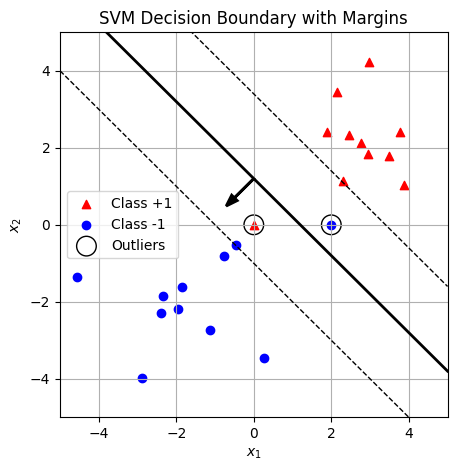

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
class1 = np.random.randn(10, 2) + np.array([2, 2])  # Shifted positive class
class2 = np.random.randn(10, 2) + np.array([-2, -2]) # Shifted negative class

# Define a linear decision boundary
# x_vals = np.linspace(np.min(np.array([class1[:,0],class2[:,0]])), np.max(np.array([class1[:,0],class2[:,0]])), 100)
x_vals = np.linspace(-5, 5, 100)
y_vals = -1*x_vals + 1.2  # Decision boundary (w.x + b = 0)

# Compute margins
margin1 = -1*x_vals + 3.4
margin2 = -1*x_vals - 1

# Plot data points
plt.figure(figsize=(5, 5))
plt.scatter(class1[:, 0], class1[:, 1], marker='^', color='r', label='Class +1')
plt.scatter(class2[:, 0], class2[:, 1], marker='o', color='b', label='Class -1')

# Outliers
plt.scatter(0, 0, marker='^', color='r')
plt.scatter(2, 0, marker='o', color='b')
plt.scatter(0, 0, s=200, facecolors='none', edgecolors='k',  marker='o', label='Outliers')
plt.scatter(2, 0, s=200, facecolors='none', edgecolors='k',  marker='o')

# ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot decision boundary and margins
plt.plot(x_vals, y_vals, 'k-', linewidth=2)
plt.plot(x_vals, margin1, 'k--', linewidth=1)
plt.plot(x_vals, margin2, 'k--', linewidth=1)

# Normal vector
plt.arrow(0, 1.2, -0.5, -0.5, head_width=0.2, head_length=0.3, fc='k', ec='k', linewidth=2)

# Labels and legend
plt.legend()
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("SVM Decision Boundary with Margins")
plt.grid(True)

# Show plot
plt.show()

The SVM discussed so far was the most trivial case where there is perfect linear separation between two classes. However, real data is never that clean and there are outlier points that can be present within the points of opposite class or sometimes sacrificing some points on edges can provide better separation between remaining ones. Thus, some relaxation method should be added to the problem for better generalization.

The SVM with the perfect separation case is called **hard margin** classifier, because there is strict locationing of all the points either to the desired side of the margins or on the margin. To combat with outliers, **soft margin** concept should be introduced which means there is still a line making the separation but small number of points to the wrong side of their class boundary is allowed but with some penalty.

In order to realize a soft margin, the slack variables $\xi_i$ should be used where one will be defined for each point $x_i$. The inequality defining the class label will be modified as

$$
y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) \geq 1 - \xi_i, \,\, \forall i
$$

The $\xi_i=0$ for the points that are obeying the hard margin rules, thus either on the margin line or to the correct side of it. As the points are on the wrong side of the margin and get farther from it, $\xi_i$ will have positive values getting larger. For $0<\xi_i <1$, the points will still be on the correct side of the hyperplane but not on the correct side of the margin. For $1<\xi_i <2$, it will be on the wrong side of the hyperplane but outside of the zone that is correct for the other class. If $\xi_i >2$, then the point is in the zone that the other class points should be present.

Though, the relaxation is allowed for more flexibility, the points with $\xi_i>0$ are still not considered the most ideal, thus we want their number to be as small as possible. Hence, the problem statement is modified as;

$$
\min_{\mathbf{w}, \, w_0, \, \xi_i} \quad \frac{1}{2} \| \mathbf{w} \|^2 + C \sum_{i=1}^n \xi_i
\quad \text{s.t.} \quad y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) \geq 1- \xi_i, \, \xi_i \geq 0 \quad i = 1, 2, \dots, n
$$

Here $C$ is a positive parameter defined by the user. For the hard margin case this was equal to $∞$. The idea is that having this term in the objective function will increase its value if there are points with positive $\xi_i$ so the minimization will force it to have minimal number of points with that. There are also versions of this problem where number of points with positive $\xi$ is added instead of $\xi$ values themselves. However, this version is preferrable because of better differentiability and it clearly penalizes points that are farther from the margin more.

Let's go to the dual problem now. The Lagrangian for the case with slack variables is;

$$
L(\mathbf{w},  w_0, \overline{\lambda}, \overline{\xi}, \overline{\mu}) = \frac{1}{2} \| \mathbf{w} \|^2 + C \sum_{i=1}^{n}  \xi_i - \sum_{i=1}^{n} \lambda_{i} (y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) - 1 + \xi_i) - \sum_{i=1}^{n} \mu_{i} \xi_i
$$

The following derivatives are necessary for the dual problem with the condition that $\mu_i \geq 0$.

$$
\frac{\partial L}{\partial \mathbf{w} } = \mathbf{w} - \sum_{i=1}^{n} \lambda_{i} y_i \mathbf{x}_{i} =0, \quad \frac{\partial L}{\partial w_0 }=-\sum_{i=1}^{n} \lambda_{i} y_i =0, \quad \frac{\partial L}{\partial \xi_i }=C-\lambda_i-\mu_i =0
$$

Then;

$$
\begin{align}
L^\ast(\lambda_1, \lambda_2, \dots, \lambda_n)  
= \min_{\mathbf{w}, \, w_0 \, \overline{\xi}} \, L(\mathbf{w},  w_0, \overline{\lambda}, \overline{\xi}, \overline{\mu})
&=\frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i  y_j \mathbf{x}_{i}^T  \mathbf{x}_{j} - \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i   y_j \mathbf{x}_{j}^T  \mathbf{x}_{i}   + \sum_{i=1}^{n}\lambda_{i} + \sum_{i=1}^{n} \xi_i \underbrace{(C-\lambda_{i}-\mu_{i})}_{=0} \\
&= \sum_{i=1}^{n}\lambda_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i  y_j \mathbf{x}_{i}^T  \mathbf{x}_{j}  \\
\end{align}
$$

Thus, we obtain the same objective function as the hard margin case but the difference will be in the constraints. Since there is the new condition that $C-\lambda_i-\mu_i =0$ with nonnegative $\lambda_i$ and $\mu_i$ values, there is also some upper bound on $\lambda_i$ values that they cannot exceed $C$. Hence, the dual problem is;

$$
\max_{\lambda_1, \lambda_2, \dots, \lambda_n} \quad \sum_{i=1}^{n}\lambda_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i  y_j \mathbf{x}_{i}^T  \mathbf{x}_{j}
\quad \text{s.t.} \quad 0 \leq \lambda_{i} \leq C, \,\,  \sum_{i=1}^{n} \lambda_{i} y_i =0, \quad i = 1, 2, \dots, n
$$

These new constraints on the limits of $\lambda_i$ are called **box constraints**. Note that in this case, the points with $\xi_i>0$ are also support vectors, not only the points on the margin boundaries.


For completeness, the KKT conditions are;

$$
\mathbf{w} = \sum_{i=1}^{n} \lambda_{i} y_i \mathbf{x}_{i}, \quad \sum_{i=1}^{n} \lambda_{i} y_i =0, \quad  \lambda_i + \mu_i = C, \,\, \forall \, i\\
\lambda_{i} (y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) - 1 + \xi_i) = 0, \quad \mu_i \xi_i = 0, \,\, \forall \, i \\
 \lambda_{i} \geq 0, \quad \mu_{i} \geq 0, \,\, \forall \, i \\
 y_i (\mathbf{w}^T \mathbf{x}_{i} + w_0) \geq 1-\xi_i, \quad \xi_i \geq 0, \,\, \forall \, i
$$

Note that the formula for $\mathbf{w}$ is same as the no outlier case. It is still a linear combination of all support vectors. However, for $w_0$, there is a slight modification. This time instead of using any support vector for calculation of $w_0$, only the ones that are on the margin boundaries must be chosen (i.e. support vectors with $\xi_i=0$). In theory, the updated formula including $\xi_i$ can be used for this, as well but in practice these $\xi_i$ values are unknown.

## Nonlinear Separable Case

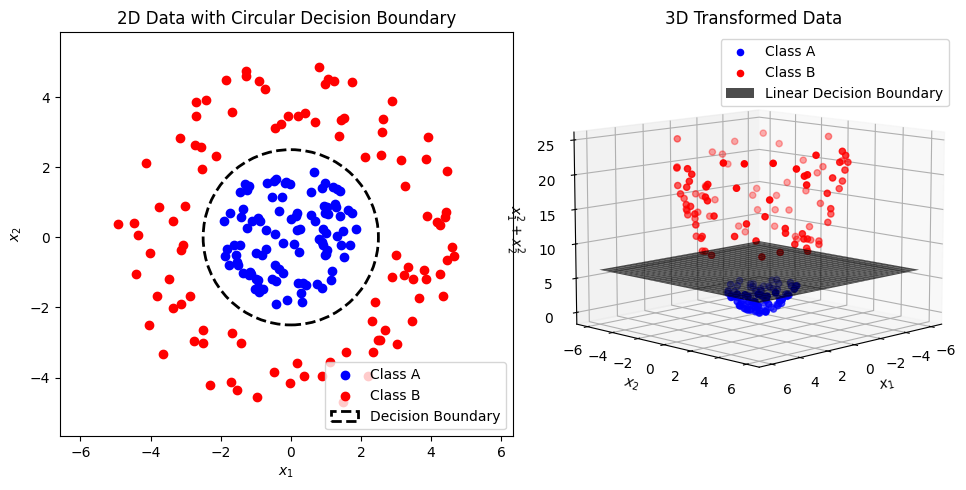

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necessary for 3D plotting

# Set seed for reproducibility
np.random.seed(0)

# Generate inner disc data (Class 0)
n_inner = 100
R_inner = 2.0
theta_inner = 2 * np.pi * np.random.rand(n_inner)
r_inner = R_inner * np.sqrt(np.random.rand(n_inner))  # sqrt for uniform distribution in circle
x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)

# Generate ring (annulus) data (Class 1)
n_ring = 100
R_ring_inner = 3.0
R_ring_outer = 5.0
theta_ring = 2 * np.pi * np.random.rand(n_ring)
# Proper sampling for annulus: sample uniformly with respect to area
r_ring = np.sqrt(np.random.rand(n_ring) * (R_ring_outer**2 - R_ring_inner**2) + R_ring_inner**2)
x_ring = r_ring * np.cos(theta_ring)
y_ring = r_ring * np.sin(theta_ring)

# Combine the datasets
X_2d = np.vstack((np.column_stack((x_inner, y_inner)), np.column_stack((x_ring, y_ring))))
y_labels = np.array([0] * n_inner + [1] * n_ring)  # 0 for disc, 1 for ring

# Create a figure with two subplots: one for 2D and one for 3D
plt.figure(figsize=(10, 5))

# ----- 2D Visualization with Circular Decision Boundary -----
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(x_inner, y_inner, color='blue', label='Class A')
ax1.scatter(x_ring, y_ring, color='red', label='Class B')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('2D Data with Circular Decision Boundary')
ax1.axis('equal')  # Keep aspect ratio equal

# Add a circular decision boundary
r_sep = (R_inner + R_ring_inner) / 2
circle = plt.Circle((0, 0), r_sep, color='black', fill=False, linestyle='--', linewidth=2, label='Decision Boundary')
ax1.add_artist(circle)
ax1.legend()

# ----- 3D Transformation and Visualization -----
# Transformation: add a new dimension z = x1^2 + x2^2
z_values = X_2d[:, 0]**2 + X_2d[:, 1]**2

ax2 = plt.subplot(1, 2, 2, projection='3d')
ax2.view_init(elev=10, azim=45)  # adjust these values as desired
# Plot inner disc points in 3D
ax2.scatter(X_2d[y_labels == 0, 0], X_2d[y_labels == 0, 1],
           (X_2d[y_labels == 0, 0]**2 + X_2d[y_labels == 0, 1]**2), color='blue', label='Class A')
# Plot ring points in 3D
ax2.scatter(X_2d[y_labels == 1, 0], X_2d[y_labels == 1, 1],
           (X_2d[y_labels == 1, 0]**2 + X_2d[y_labels == 1, 1]**2), color='red', label='Class B')

ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$x_1^2 + x_2^2$')
ax2.set_title('3D Transformed Data')

# Add the separating plane: in 3D, the decision boundary is where z = r_sep^2.
# Create a grid of (x,y) values covering the data range
xx = np.linspace(-6, 6, 30)
yy = np.linspace(-6, 6, 30)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.full(XX.shape, r_sep**2)  # constant plane at z = r_sep^2

# Plot the plane with some transparency
ax2.plot_surface(XX, YY, ZZ, alpha=0.7, color='black', edgecolor='none', label='Linear Decision Boundary')
ax2.legend()

plt.tight_layout()
plt.show()

Though SVM is a powerful classification algorithm, the one introduced so far has a major limitation that it can only make linear decision boundaries which is not realistic most of the time. SVM inherently generates linear boundaries but this issue can be overcome by transforming a dataset with a nonlinear boundary to a higher dimensional space that it can be separated linearly there. One trivial example is assume we have $\mathbf{X}=[-2, -1, 1, 2]$ with labels $\mathbf{y}=[+1, -1, -1, +1]$. Hence, the points in the middle and points at the edges have the same class labels with each other. There is no line separating this dataset but if we take the square of the data and have a new dataset $\mathbf{X}^\prime=[4, 1, 1, 4]$, the linear separation becomes possible (i.e. $\mathbf{X}^\prime>\alpha$ for $1<\alpha<4$).

With that background, we can define a transform function $\Phi$ that allows linear separation of the dataset. In that case the problem will be;

$$
\max_{\lambda_1, \lambda_2, \dots, \lambda_n} \quad \sum_{i=1}^{n}\lambda_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i  y_j \Phi^T(\mathbf{x}_{i})  \Phi(\mathbf{x}_{j})
\quad \text{s.t.} \quad 0 \leq \lambda_{i} \leq C, \,\,  \sum_{i=1}^{n} \lambda_{i} y_i =0, \quad i = 1, 2, \dots, n
$$

The decision for arbitrary point $\mathbf{x}$ will be done via;

$$
f(\mathbf{x}) =  \sum_{i=1}^{n} \lambda_{i} y_i \Phi^T(\mathbf{x}_{i}) \Phi(\mathbf{x}) + w_0
$$

One problem is that when transforming a variable to enable linear separability, the transformed space is usually higher dimensional and this can make computations infeasible. However, observing above equations, we see that transformed points never appear isolated but as dot products of 2 points at least. This allows for a great simplification called **kernel trick** that without making the transformations to another space we can get the same dot product result within the same space using a kernel function. The above equations can be rewritten as;

$$
\max_{\lambda_1, \lambda_2, \dots, \lambda_n} \quad \sum_{i=1}^{n}\lambda_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i  y_j K(\mathbf{x}_{i}, \mathbf{x}_{j}) \quad \text{s.t.} \quad 0 \leq \lambda_{i} \leq C, \,\,  \sum_{i=1}^{n} \lambda_{i} y_i =0, \quad i = 1, 2, \dots, n
$$

and decision rule as;

$$
f(\mathbf{x}) =  \sum_{i=1}^{n} \lambda_{i} y_i K(\mathbf{x}_{i}, \mathbf{x}) + w_0
$$

where $K(\mathbf{x}, \mathbf{y}) = \Phi^T(\mathbf{x}) \Phi(\mathbf{y})$.

A toy example for the usage of kernel trick is that the 2D case in the original space with $\mathbf{x}=[x_1, x_2]$. Let's say for the separation, this should be transformed to 6D space with

$\Phi(\mathbf{x})=[1, \sqrt{2} x_1, \sqrt{2} x_2, x_1^2, x_2^2, \sqrt{2} x_1 x_2]$

The dot product $\Phi^T(\mathbf{x}) \Phi(\mathbf{y})$ will be;

$1+2x_1 y_1 + 2x_2 y_2 + x_1^2 y_1^2 + x_2^2 y_2^2 + 2 x_1 x_2 y_1 y_2$

However, instead of storing the 6D vector at any point, we could obtain the same dot product result using kernel $K(\mathbf{x}, \mathbf{y})=(\mathbf{x}^T \mathbf{y}+1)^2$. This way we never have to go to a space that is higher dimensional than the original one and since all the necessary operations in SVM is defined as dot products of transformed variables, this is sufficient for all practical purposes.

## SVM Implementation

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, tol=1e-3, max_passes=10, C=np.inf):
        self.tol = tol  # Tolerance for convergence
        self.max_passes = max_passes  # Number of times to loop without changes
        self.lambda_ = None  # Lagrange multipliers
        self.w_0 = None  # Bias term
        self.w = None  # Weight vector (only needed for visualization, can be skipped)
        self.C=C # parameter to control the allowed misclassifications, infinite in the hard margin case

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.lambda_ = np.zeros(n_samples)
        self.w_0 = 0
        self.w = np.zeros(n_features)

        passes = 0
        while passes < self.max_passes:
            num_changed_lambdas = 0
            for i in range(n_samples):
                # Compute prediction
                E_i = self._decision_function(X[i], X, y) - y[i]

                if (y[i] * E_i < -self.tol and self.lambda_[i] < self.C) or (y[i] * E_i > self.tol and self.lambda_[i] > 0):
                    # Select j randomly
                    j = np.random.choice([x for x in range(n_samples) if x != i])
                    E_j = self._decision_function(X[j], X, y) - y[j]

                    lambda_i_old, lambda_j_old = self.lambda_[i], self.lambda_[j]

                    # Compute L and H (box constraints for lambda)
                    if y[i] != y[j]:
                        L = max(0, self.lambda_[j] - self.lambda_[i])
                        H = min(self.C, self.C + self.lambda_[j] - self.lambda_[i])
                    else:
                        L = max(0, self.lambda_[i] + self.lambda_[j] - self.C)
                        H = min(self.C, self.lambda_[i] + self.lambda_[j])

                    if L == H:
                        continue

                    # Compute eta (second derivative of objective function in order to check convexity)
                    eta = X[i] @ X[i] + X[j] @ X[j] - 2 * X[i] @ X[j]
                    if eta <= 0:
                        continue

                    # Update lambda_j
                    self.lambda_[j] += y[j] * (E_i - E_j) / eta
                    self.lambda_[j] = np.clip(self.lambda_[j], L, H)

                    if abs(self.lambda_[j] - lambda_j_old) < 1e-5:
                        continue

                    # Update lambda_i
                    self.lambda_[i] += y[i] * y[j] * (lambda_j_old - self.lambda_[j])

                    # Compute bias term b
                    b1 = self.w_0 - E_i - y[i] * (self.lambda_[i] - lambda_i_old) * X[i] @ X[i] \
                         - y[j] * (self.lambda_[j] - lambda_j_old) * X[i] @ X[j]
                    b2 = self.w_0 - E_j - y[i] * (self.lambda_[i] - lambda_i_old) * X[i] @ X[j] \
                         - y[j] * (self.lambda_[j] - lambda_j_old) * X[j] @ X[j]

                    if 0 < self.lambda_[i] < self.C:
                        self.w_0 = b1
                    elif 0 < self.lambda_[j] < self.C:
                        self.w_0 = b2
                    else:
                        self.w_0 = (b1 + b2) / 2

                    num_changed_lambdas += 1

            if num_changed_lambdas == 0:
                passes += 1
            else:
                passes = 0

        # Compute weight vector w (optional, for visualization purposes)
        self.w = np.sum((self.lambda_ * y)[:, None] * X, axis=0)

    def _decision_function(self, x, X, y):
        return np.sum(self.lambda_ * y * (X @ x)) + self.w_0

    def predict(self, X):
        return np.sign(self._decision_function(X))


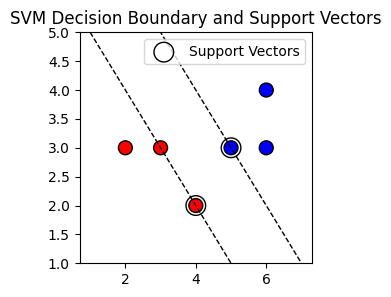

In [16]:
# Generate toy dataset
np.random.seed(0)
# X = np.array([[2, 3], [3, 3], [3, 2], [5, 3], [6, 2], [6, 4]])
X = np.array([[2, 3], [3, 3], [4, 2], [5, 3], [6, 3], [6, 4]])
y = np.array([1, 1, 1, -1, -1, -1])

# X = np.array([[2, 3], [2,2], [3,2], [1,2], [3, 3], [4, 2], [5, 3], [6, 3], [6, 4], [5, 4], [7, 4]])
# y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1])

# Train SVM
svm = SVM()
svm.fit(X, y)

# Identify support vectors
support_vectors = X[svm.lambda_ > 1e-5]
# print("Support Vectors:", support_vectors)

# Plot decision boundary and margins
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

x_vals=np.linspace(x_min, x_max, 100)
weights, w_0 = svm.w, svm.w_0
y_vals_plus= (1-w_0-weights[0]*x_vals)/weights[1]
y_vals_minus= (-1-w_0-weights[0]*x_vals)/weights[1]
plt.plot(x_vals, y_vals_plus, 'k--', linewidth=1)
plt.plot(x_vals, y_vals_minus, 'k--', linewidth=1)

ax.set_title("SVM Decision Boundary and Support Vectors")
plt.ylim([y_min, y_max])
ax.legend()
plt.show()

## Sequential Minimal Optimization (SMO) (Optional)

Sequential Minimal Optimization (SMO) is a technique to solve the SVM optimization problem by dividing it into easily manageable sub-problems and solving these subproblems until a global satisfaction level is reached meaning the coefficients $\lambda_i$ have values that overall situation obeys the KKT conditions within an acceptable level of tolerance. This is achieved by picking 2 vectors at any time and update their $\lambda_i$ coefficients such that the KKT conditions are better approximated.

This algorithm is summarized as two steps in many places as;

Until convergence
* Find a coefficient $\lambda_a$ that violates the KKT conditions.
* Find a second coefficent $\lambda_b$, and optimize the pair $(\lambda_a, \lambda_b)$ together.

This is indeed the essence of the SMO but with that level of abstraction, the algorithm is oversimplified, since the more interesting part is how the second step of pair optimization is done which deserves more than a sentence of explanation. This can change for the different implementations of course but one possible implementation is given in the remainder of this section. We will start with how the update equations for the 2 $\lambda_i$ values and $w_0$ are derived and what is rationale behind each; and then give the actual algorithm.

$$
\max_{\lambda_1, \lambda_2, \dots, \lambda_n} \quad \sum_{i=1}^{n}\lambda_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i  y_j K(\mathbf{x}_{i},  \mathbf{x}_{j})
\quad \text{s.t.} \quad 0 \leq \lambda_{i} \leq C, \,\,  \sum_{i=1}^{n} \lambda_{i} y_i =0, \quad i = 1, 2, \dots, n
$$

The nonlinear SVM problem with outliers was defined as above. Now for the implementation of the SMO, we need 2 of the vectors at any given time. Thus, let's expand the summations such that we can isolate terms related to vectors with coefficients $\lambda_a$ and $\lambda_b$; and collect the other terms in a single variable.

\begin{align}
J(\lambda_1, \lambda_2, \dots, \lambda_n) &=
\sum_{i=1}^{n}\lambda_{i} - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_i  y_j K(\mathbf{x}_{i},  \mathbf{x}_{j}) \\
&= \lambda_{a} + \lambda_{b} - \frac{1}{2} \lambda_{a}^2 \underbrace{y_a^2}_{=1} K(\mathbf{x}_{a},  \mathbf{x}_{a}) - \frac{1}{2} \lambda_{b}^2 \underbrace{y_b^2}_{=1} K(\mathbf{x}_{b},  \mathbf{x}_{b}) - \lambda_{a} \lambda_{b} y_a  y_b K(\mathbf{x}_{a},  \mathbf{x}_{b}) \\
& - \lambda_{a} y_a \sum_{\substack{j=1 \\ j \neq a, \, j \neq b}}^{n} \lambda_{j} y_j K(\mathbf{x}_{a},  \mathbf{x}_{j})
- \lambda_{b} y_b \sum_{\substack{j=1 \\ j \neq a, \, j \neq b}}^{n} \lambda_{j} y_j K(\mathbf{x}_{b},  \mathbf{x}_{j})
+ J(\lambda_i : i \neq a,b)
\end{align}

Discarding the terms that are independent from $\lambda_a$ and $\lambda_b$, we can define a new objective function $J_1(\lambda_a, \lambda_b)$. The goal in SMO is maximizing this function containing only 2 vectors. Since the original problem also contained a constraint of linear combination of labels adding up to 0, it will be reflected as the linear combination of the labels of the 2 vectors adding up to a constant. Hence the new problem is

$$
\max_{\lambda_a, \lambda_b} \quad J_1(\lambda_a, \lambda_b)
\quad \text{s.t.} \quad 0 \leq \lambda_{a}, \lambda_{b} \leq C, \,\, \lambda_{a} + y_a y_b \lambda_{b} = A
$$

This new condition also implies that if the value of $\lambda_a$ is changed with $\lambda_a^\ast$, then $\lambda_b$ will also change obeying $\lambda_{a}^\ast + y_a y_b \lambda_{b}^\ast = A$. This dependence will make the backbone of the update rule of the SMO.

Since there is the dependence of $\lambda_a$ and $\lambda_b$ of this problem, the objective function can be rewritten as a function of $\lambda_b$ only as;

\begin{align}
J_2(\lambda_b) &= J_1(\lambda_a, \lambda_b) \bigg|_{\lambda_a=A-y_a y_b \lambda_b} \\
&= A-y_a y_b \lambda_b + \lambda_{b} - \frac{1}{2} (A-y_a y_b \lambda_b)^2
 K(\mathbf{x}_{a},  \mathbf{x}_{a}) - \frac{1}{2} \lambda_{b}^2  K(\mathbf{x}_{b},  \mathbf{x}_{b}) - (A-y_a y_b \lambda_b) \lambda_{b} y_a  y_b K(\mathbf{x}_{a},  \mathbf{x}_{b}) \\
&- (A-y_a y_b \lambda_b) y_a \sum_{\substack{j=1 \\ j \neq a, \, j \neq b}}^{n} \lambda_{j} y_j K(\mathbf{x}_{a},  \mathbf{x}_{j})
- \lambda_{b} y_b \sum_{\substack{j=1 \\ j \neq a, \, j \neq b}}^{n} \lambda_{j} y_j K(\mathbf{x}_{b},  \mathbf{x}_{j}) \\
&= A+ (y_b-y_a) y_b \lambda_b - \frac{1}{2} (A-y_a y_b \lambda_b)^2
 K(\mathbf{x}_{a},  \mathbf{x}_{a}) - \frac{1}{2} \lambda_{b}^2  K(\mathbf{x}_{b},  \mathbf{x}_{b}) - (A-y_a y_b \lambda_b) \lambda_{b} y_a  y_b K(\mathbf{x}_{a},  \mathbf{x}_{b}) \\
& - A y_a \sum_{\substack{j=1 \\ j \neq a, \, j \neq b}}^{n} \lambda_{j} y_j K(\mathbf{x}_{a},  \mathbf{x}_{j})
+ \lambda_{b} y_b \sum_{\substack{j=1 \\ j \neq a, \, j \neq b}}^{n} \lambda_{j} y_j (K(\mathbf{x}_{a},  \mathbf{x}_{j}) - K(\mathbf{x}_{b},  \mathbf{x}_{j}))
\end{align}

In order to find the optimum $\lambda_b$ the above objective must be differentiated and equated to $0$. The derivative w.r.t. $\lambda_b$ will be

\begin{align}
\frac{\partial J_2(\lambda_b)}{\partial \lambda_b}
= &(y_b-y_a) y_b + (A-y_a y_b \lambda_b) y_a y_b
 K(\mathbf{x}_{a},  \mathbf{x}_{a}) - \lambda_{b}  K(\mathbf{x}_{b},  \mathbf{x}_{b}) - (A y_a  y_b - 2 \lambda_b)  K(\mathbf{x}_{a},  \mathbf{x}_{b}) \\
& +  y_b  \sum_{\substack{j=1 \\ j \neq a, \, j \neq b}}^{n} \lambda_{j} y_j \left( K(\mathbf{x}_{a},  \mathbf{x}_{j}) - K(\mathbf{x}_{b},  \mathbf{x}_{j}) \right) = 0
\end{align}

Now let's make some substitutions to turn this into an update rule so that we can see the previous iteration values as $\lambda_b^{\text{old}}$. $A$ was the constant that was a constraint on this two variable problem, we can write it as $A=\lambda_a^{\text{old}} + y_a y_b \lambda_b^{\text{old}}$. Further we should expand the summation with the notation $f(\mathbf{x})$ giving the SVM prediction of vector $\mathbf{x}$.

\begin{align}
\sum_{\substack{j=1 \\ j \neq a, \, j \neq b}}^{n} \lambda_{j}^{\text{old}} y_j \left( K(\mathbf{x}_{a},  \mathbf{x}_{j}) - K(\mathbf{x}_{b},  \mathbf{x}_{j}) \right)
&= \underbrace{\sum_{j=1}^{n} \lambda_{j}^{\text{old}} y_j \left( K(\mathbf{x}_{a},  \mathbf{x}_{j}) - K(\mathbf{x}_{b},  \mathbf{x}_{j}) \right)}_{f(\mathbf{x}_{a})-f(\mathbf{x}_{b})}
-\lambda_{a}^{\text{old}} y_a \left( K(\mathbf{x}_{a},  \mathbf{x}_{a}) - K(\mathbf{x}_{b},  \mathbf{x}_{a}) \right)
-\lambda_{b}^{\text{old}} y_b \left( K(\mathbf{x}_{a},  \mathbf{x}_{b}) - K(\mathbf{x}_{b},  \mathbf{x}_{b}) \right)
\end{align}

Based on these new substitutions, rearranging the equation such that the new values $\lambda_b$ on one side and the previous ones $\lambda_{b}^{\text{old}}$ on the other.

\begin{align}
(y_b-y_a) y_b &+ \lambda_a^{\text{old}} y_a y_b
 K(\mathbf{x}_{a},  \mathbf{x}_{a}) + \lambda_b^{\text{old}} K(\mathbf{x}_{a},  \mathbf{x}_{a}) - \lambda_b K(\mathbf{x}_{a},  \mathbf{x}_{a})
 - \lambda_{b}  K(\mathbf{x}_{b},  \mathbf{x}_{b}) - \lambda_a^{\text{old}} y_a  y_b K(\mathbf{x}_{a},  \mathbf{x}_{b}) - \lambda_b^{\text{old}} K(\mathbf{x}_{a},  \mathbf{x}_{b}) \\ \\
 &+ 2 \lambda_b  K(\mathbf{x}_{a},  \mathbf{x}_{b}) +  y_b (f(\mathbf{x}_{a})-f(\mathbf{x}_{b})) -\lambda_{a}^{\text{old}} y_a y_b
 \left( K(\mathbf{x}_{a},  \mathbf{x}_{a}) - K(\mathbf{x}_{b},  \mathbf{x}_{a}) \right)
-\lambda_{b}^{\text{old}} \left( K(\mathbf{x}_{a},  \mathbf{x}_{b}) - K(\mathbf{x}_{b},  \mathbf{x}_{b}) \right) = 0
\end{align}

Rearranging

\begin{align}
 \lambda_b \eta
&= \lambda_b^{\text{old}} \eta  
+  y_b (\underbrace{(f(\mathbf{x}_{a})-y_a)}_{E_a}-\underbrace{(f(\mathbf{x}_{b})-y_b)}_{E_b}) , \,\, \text{where} \,\, \eta=K(\mathbf{x}_{a},  \mathbf{x}_{a}) + K(\mathbf{x}_{b},  \mathbf{x}_{b}) - 2 K(\mathbf{x}_{a},  \mathbf{x}_{b})
\end{align}

Hence, dividing all sides by the common term, the update equation for $\lambda_b$ is;

$$
\lambda_b = \lambda_b^{\text{old}} + \frac{y_b (E_a-E_b)}{\eta}
$$

Moreover, since we had the constraint $\lambda_{a}^\ast + y_a y_b \lambda_{b}^\ast = A$. Applying this to previous and updated values, we can write;

$$
\lambda_{a} + y_a y_b \lambda_{b} = \lambda_{a}^{\text{old}} + y_a y_b \lambda_{b}^{\text{old}}
$$

Then the update rule for $\lambda_a$ is;

$$
\lambda_{a} = \lambda_{a}^{\text{old}} + y_a y_b (\lambda_{b}^{\text{old}} - \lambda_{b})
$$

<!-- Leaving the terms with $\lambda_b$ on one side;

\begin{align}
\lambda_b \left(K(\mathbf{x}_{a},  \mathbf{x}_{a}) +  K(\mathbf{x}_{b},  \mathbf{x}_{b}) - 2  K(\mathbf{x}_{a},  \mathbf{x}_{b}) \right)
&= 1-y_a y_b + A y_a y_b \left( K(\mathbf{x}_{a},  \mathbf{x}_{a}) - K(\mathbf{x}_{a},  \mathbf{x}_{b}) \right)
 +  y_b  \sum_{\substack{j=1 \\ j \neq a, \, j \neq b}}^{n} \lambda_{j} y_j \left( K(\mathbf{x}_{a},  \mathbf{x}_{j}) - K(\mathbf{x}_{b},  \mathbf{x}_{j}) \right)\\
\end{align} -->

The final update equation will be for offset $w_0$. Let's go back to prediction equation of SVM for vector $\mathbf{x}$;

$$
f(x) = \sum_{i=1}^{n} \lambda_i y_i K(\mathbf{x}_{i}, \mathbf{x}) + w_0
$$

Assume in the previous iteration, this was $f^\text{old}(\mathbf{x})$ with the coefficients $\lambda^\text{old}_i$. Note that since only updates are done for $\lambda_a$ and $\lambda_b$, for $i \neq a, b$; $\lambda_i = \lambda^\text{old}_i$. Let's add and subtract $f^\text{old}(\mathbf{x})$ to above expression;

\begin{align}
f(\mathbf{x}) &= \sum_{i=1}^{n} \lambda_i y_i K(\mathbf{x}_{i}, \mathbf{x}) + w_0 +f^\text{old}(\mathbf{x}) - f^\text{old}(\mathbf{x}) \\
&= f^\text{old}(\mathbf{x}) + \sum_{i=1}^{n} \lambda_i y_i K(\mathbf{x}_{i}, \mathbf{x}) + w_0 - \sum_{i=1}^{n} \lambda_i^\text{old} y_i K(\mathbf{x}_{i}, \mathbf{x}) - w_0^\text{old} \\
&= f^\text{old}(\mathbf{x}) + (\lambda_a-\lambda_a^\text{old}) y_a K(\mathbf{x}_{a}, \mathbf{x}) + (\lambda_b-\lambda_b^\text{old}) y_b K(\mathbf{x}_{b}, \mathbf{x}) + w_0 - w_0^\text{old} \\
\end{align}

Since $f(\mathbf{x}_{a})=y_a$ and $f(\mathbf{x}_{b})=y_b$, we have

\begin{align}
y_a &= f^\text{old}(\mathbf{x}_{a}) + (\lambda_a-\lambda_a^\text{old}) y_a K(\mathbf{x}_{a}, \mathbf{x}_{a}) + (\lambda_b-\lambda_b^\text{old}) y_b K(\mathbf{x}_{b}, \mathbf{x}_{a}) + w_0 - w_0^\text{old} \\
y_b &= f^\text{old}(\mathbf{x}_{b}) + (\lambda_a-\lambda_a^\text{old}) y_a K(\mathbf{x}_{a}, \mathbf{x}_{b}) + (\lambda_b-\lambda_b^\text{old}) y_b K(\mathbf{x}_{b}, \mathbf{x}_{b}) + w_0 - w_0^\text{old} \\
\end{align}

Then we have two update equations for $w_0$. Call them $w_{0,a}$ and $w_{0,b}$.

\begin{align}
w_{0,a} &= w_0^\text{old} - \underbrace{(f^\text{old}(\mathbf{x}_{a})- y_a )}_{E_a} - (\lambda_a-\lambda_a^\text{old}) y_a K(\mathbf{x}_{a}, \mathbf{x}_{a}) - (\lambda_b-\lambda_b^\text{old}) y_b K(\mathbf{x}_{b}, \mathbf{x}_{a})   \\
w_{0,b} &= w_0^\text{old} - \underbrace{(f^\text{old}(\mathbf{x}_{b})- y_b )}_{E_b} - (\lambda_a-\lambda_a^\text{old}) y_a K(\mathbf{x}_{a}, \mathbf{x}_{b}) - (\lambda_b-\lambda_b^\text{old}) y_b K(\mathbf{x}_{b}, \mathbf{x}_{b})   \\
\end{align}

Thus the final equations are;

\begin{align}
w_{0,a} &= w_0^\text{old} - E_a - (\lambda_a-\lambda_a^\text{old}) y_a K(\mathbf{x}_{a}, \mathbf{x}_{a}) - (\lambda_b-\lambda_b^\text{old}) y_b K(\mathbf{x}_{b}, \mathbf{x}_{a})   \\
w_{0,b} &= w_0^\text{old} - E_b - (\lambda_a-\lambda_a^\text{old}) y_a K(\mathbf{x}_{a}, \mathbf{x}_{b}) - (\lambda_b-\lambda_b^\text{old}) y_b K(\mathbf{x}_{b}, \mathbf{x}_{b})   \\
\end{align}

Of note, these two equations are supposed to give the same results as long as both $\lambda_a$ and $\lambda_b$ are support vectors. However, the nonlinear application of the box constraints on the $\lambda_i$ can change this on some iterations. How this will be applied is also another implementation choice.

Now based on the 3 update equations given, the SMO algorithm can be written as;

Pick a vector from the training set sequentially with index $a$.
* Calculate error $E_a=f(\mathbf{x}_a)-y_a$.
* If $(y_a E_a<-\epsilon \,\, \land \,\, \lambda_a<C) \lor (y_a E_a>\epsilon \,\, \land \,\, \lambda_a>0)$ then proceed (i.e. KKT not satisfied)

  1. Pick another $\lambda_b$ such that $a\neq b$. Calculate error $E_b=f(\mathbf{x}_b)-y_b$.
  2. Save the current values of $(\lambda_a, \lambda_b)$ as $(\lambda_a^\text{old}, \lambda_b^\text{old})$.
  3. Find lower and upper bounds for $\lambda_b$ based on box constraints and the additional SMO constraint of $\lambda_{a}^\ast + y_a y_b \lambda_{b}^\ast = A$.
      * If $y_a \neq y_b$; then $L=\max(0, \lambda_b-\lambda_a)$ and $H=\min(C, C+\lambda_b-\lambda_a)$
      * If $y_a = y_b$; then $L=\max(0, \lambda_a+\lambda_b-C)$ and $H=\min(C, \lambda_a+\lambda_b)$
      * Break current loop if $L=H$.
  4. Calculate $\eta=K(\mathbf{x}_{a},  \mathbf{x}_{a}) + K(\mathbf{x}_{b},  \mathbf{x}_{b}) - 2 K(\mathbf{x}_{a},  \mathbf{x}_{b})$ and check convexity
      * Break current loop if $\eta<=0$.
  5. Update $\lambda_b$.
      * $\lambda_b = \lambda_b^{\text{old}} + \frac{y_b (E_a-E_b)}{\eta}$
      * $\lambda_b = \text{clip}(\lambda_b, L, H)$
      * Break loop if the update on $\lambda_b$ is small.

  6. Update $\lambda_a$.
      * $\lambda_{a} = \lambda_{a}^{\text{old}} + y_a y_b (\lambda_{b}^{\text{old}} - \lambda_{b})$
  7. Update $w_0$.
      * \begin{align}
        w_{0,a} &= w_0^\text{old} - E_a - (\lambda_a-\lambda_a^\text{old}) y_a K(\mathbf{x}_{a}, \mathbf{x}_{a}) - (\lambda_b-\lambda_b^\text{old}) y_b K(\mathbf{x}_{b}, \mathbf{x}_{a})   \\
        w_{0,b} &= w_0^\text{old} - E_b - (\lambda_a-\lambda_a^\text{old}) y_a K(\mathbf{x}_{a}, \mathbf{x}_{b}) - (\lambda_b-\lambda_b^\text{old}) y_b K(\mathbf{x}_{b}, \mathbf{x}_{b})   \\
        \end{align}
      * If either $\mathbf{x}_a$ or $\mathbf{x}_b$ is a support vector on the margin (i.e. $0<\lambda_a<C$ or $0<\lambda_b<C$ with strict inequality), then either of these updates values, corresponding to the vector obeying support vector condition, can be used for $w_0$ in the next iteration.
      * If neither of them obeys support vector condition, then take an average $w_0=(w_{0,a}+w_{0,b})/2$.
